Global Imports for the project.

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Import all raw data into a dataframe and display the first 5 rows as a sanity check.

In [106]:
# Import data
file_path = "dataset_full.csv"
phishing_df = pd.read_csv ( file_path )
phishing_df.head (20 )

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
5,1,0,0,2,0,0,0,0,0,0,...,1,3,3,3591,1,0,0,0,0,1
6,2,0,0,0,0,0,0,0,0,0,...,1,2,2,291,0,0,0,0,0,0
7,2,0,0,3,0,0,0,0,0,0,...,1,2,1,3134,1,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3596,1,1,0,0,0,0
9,1,0,0,2,0,0,0,0,0,0,...,1,2,1,14397,1,0,0,0,0,1


In [107]:
phishing_df.dtypes

qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object

In [108]:
legitimate_count = ( phishing_df['phishing'] == 0 ).sum ()
phishing_count = ( phishing_df['phishing'] == 1 ).sum ()

print ( f"Total legitimate websites: {legitimate_count}" )
print ( f"Total phishing websites: {phishing_count}" )

Total legitimate websites: 58000
Total phishing websites: 30647


In [109]:
zero_directory_length_count = ( phishing_df['directory_length'] == 0 ).sum ()

zero_file_length_count = ( phishing_df['file_length'] == 0 ).sum ()

zero_parameters_length_count = ( phishing_df['params_length'] == 0 ).sum ()

print ( f"Number of rows where directory length is 0: {zero_directory_length_count}" )
print ( f"Number of rows where file length is 0: {zero_file_length_count}" )
print ( f"Number of rows where parameters length is 0: {zero_parameters_length_count}" )

Number of rows where directory length is 0: 0
Number of rows where file length is 0: 19624
Number of rows where parameters length is 0: 0


In [110]:
#small_rows = phishing_df[(phishing_df['length_url'] >= 0) & (phishing_df['length_url'] <= 50) & (phishing_df['phishing'] == 1)]
#one_to_fifty_count = small_rows.shape[0]
#display ( small_rows )

one_to_fifty_count = phishing_df[(phishing_df['length_url'] >= 0) & (phishing_df['length_url'] <= 50) & (phishing_df['phishing'] == 1)].shape[0]

fiftyone_to_onehundred_count = phishing_df[(phishing_df['length_url'] >= 51) & (phishing_df['length_url'] <= 100) & (phishing_df['phishing'] == 1)].shape[0]

onehundredone_to_onehundredfifty_count = phishing_df[(phishing_df['length_url'] >= 101) & (phishing_df['length_url'] <= 150) & (phishing_df['phishing'] == 1)].shape[0]

greater_than_onehundredfifty_count = phishing_df[(phishing_df['length_url'] >= 151) & (phishing_df['phishing'] == 1)].shape[0]


print ( f"Number of phishing positive rows where lenght of URL is 1-50 characters: {one_to_fifty_count}" )
print ( f"Number of phishing positive rows where lenght of URL is 51-100 characters: {fiftyone_to_onehundred_count}" )
print ( f"Number of phishing positive rows where lenght of URL is 101-150 characters: {onehundredone_to_onehundredfifty_count}" )
print ( f"Number of phishing positive rows where lenght of URL is > 150 characters: {greater_than_onehundredfifty_count}" )

Number of phishing positive rows where lenght of URL is 1-50 characters: 16863
Number of phishing positive rows where lenght of URL is 51-100 characters: 9497
Number of phishing positive rows where lenght of URL is 101-150 characters: 1983
Number of phishing positive rows where lenght of URL is > 150 characters: 2304


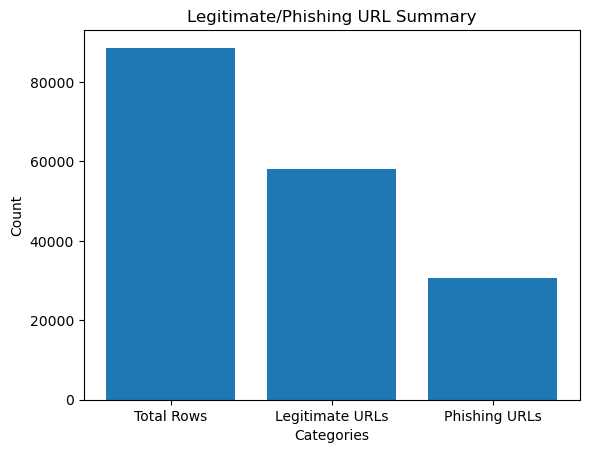

In [111]:
total_rows = phishing_df.shape[0]

counts = [total_rows, legitimate_count, phishing_count]
labels = ['Total Rows', 'Legitimate URLs', 'Phishing URLs']

plt.bar ( labels, counts )
plt.xlabel ( 'Categories' )
plt.ylabel ( 'Count' )
plt.title ( 'Legitimate/Phishing URL Summary' )
plt.show ()

In [112]:
correlations = phishing_df.corr ().abs() #['phishing'].drop ( 'phishing' )
#correlations = phishing_df.corr().abs()['phishing'].drop('phishing')
print ( correlations )

                      qty_dot_url  qty_hyphen_url  qty_underline_url  \
qty_dot_url              1.000000        0.109737           0.127851   
qty_hyphen_url           0.109737        1.000000           0.213589   
qty_underline_url        0.127851        0.213589           1.000000   
qty_slash_url            0.246201        0.304762           0.246653   
qty_questionmark_url     0.409549        0.061247           0.067009   
...                           ...             ...                ...   
qty_redirects            0.051842        0.001930           0.013864   
url_google_index         0.004035        0.002939           0.001823   
domain_google_index      0.002490        0.006875           0.003421   
url_shortened            0.059222        0.010346           0.012158   
phishing                 0.171128        0.200382           0.191151   

                      qty_slash_url  qty_questionmark_url  qty_equal_url  \
qty_dot_url                0.246201              0.409549  

In [113]:
droplist = []
keeplist = []
for col in correlations.columns:
    # print(correlation_matrix[col])
    gt80_index = correlations.loc[correlations[col]>=.80].index
    for ind in gt80_index:
        if ind!=col and ind not in keeplist:
            droplist.append(ind)
        else:
            keeplist.append(col)
            # df.drop(columns=[ind], inplace=True)
            # correlation_matrix = abs(df.corr())
droplist = list(set(droplist))
phishing_df.drop(columns=droplist, inplace=True)

phishing_df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,0,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [114]:
# Drop all columsn where every value in the column is 0
# Note that this should only be columns that start with 'qty_'
columns_all_zeros = phishing_df.loc[:, phishing_df.eq ( 0 ).all ()]
#print ( columns_all_zeros )
phishing_df.drop ( columns_all_zeros.columns, axis=1, inplace=True )

phishing_df.to_csv ( 'filtered_dataset.csv', index=False )

phishing_df


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,0,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [115]:
correlation_matrix = phishing_df.corr ()
mask = np.zeros_like(correlation_matrix, dtype=bool)

mask[np.triu_indices_from(mask)] = True

correlation_matrix[mask] = np.nan
(correlation_matrix
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_percent_directory,directory_length,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_percent_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
qty_dot_url,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
qty_hyphen_url,0.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
qty_underline_url,0.13,0.21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
qty_slash_url,0.25,0.30,0.25,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
qty_questionmark_url,0.41,0.06,0.07,0.18,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
qty_equal_url,0.50,0.18,0.33,0.29,0.46,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
qty_at_url,0.17,0.04,0.06,0.10,0.13,0.17,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
qty_exclamation_url,0.00,0.02,0.06,0.03,0.02,0.05,0.19,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
qty_space_url,-0.00,0.02,-0.00,0.02,0.00,0.01,0.00,-0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
qty_tilde_url,0.03,0.01,0.04,0.07,0.00,0.00,0.02,0.08,-0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [121]:
# Define the features (X) and target (y)
X = phishing_df.drop(columns='phishing')  # Features are all columns except 'phishing'
y = phishing_df['phishing']    

In [122]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [125]:
# Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [137]:
print ( importances )

[1.10978059e-02 1.08018330e-02 4.32432443e-03 8.46341217e-02
 2.07899361e-05 4.11503886e-03 2.50702473e-04 9.89505685e-05
 3.47316088e-06 1.13536102e-04 1.19637782e-04 2.67349950e-04
 1.94424888e-05 1.97774935e-06 1.21588523e-05 9.43800594e-04
 2.16318116e-03 6.70718717e-02 1.89990376e-02 3.36110798e-03
 1.16987613e-05 2.14621071e-06 1.65645312e-02 3.92327224e-04
 1.05479978e-04 6.05818901e-02 7.79496319e-02 7.73770007e-02
 7.75624763e-02 1.32664108e-01 8.07645161e-02 5.94076021e-03
 2.68409373e-03 5.71587865e-03 1.99495565e-03 2.37138188e-03
 6.51565469e-03 4.05383460e-04 2.66327873e-02 5.11212352e-03
 2.57989122e-02 8.31527422e-02 2.34851409e-02 8.98791597e-03
 1.25861414e-02 1.27244170e-02 2.77509315e-02 6.14016061e-03
 8.14833055e-03 1.41502246e-04 7.06697222e-05 1.24416858e-03]


In [126]:
# Rank features by importance and display them
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                    Feature  Importance
29         directory_length    0.132664
3             qty_slash_url    0.084634
41   time_domain_activation    0.083153
30              file_length    0.080765
26     qty_hyphen_directory    0.077950
28    qty_percent_directory    0.077562
27  qty_underline_directory    0.077377
17               length_url    0.067072
25        qty_dot_directory    0.060582
46             ttl_hostname    0.027751
38            time_response    0.026633
40                   asn_ip    0.025799
42   time_domain_expiration    0.023485
18           qty_dot_domain    0.018999
22        qty_vowels_domain    0.016565
45           qty_mx_servers    0.012724
44          qty_nameservers    0.012586
0               qty_dot_url    0.011098
1            qty_hyphen_url    0.010802
43          qty_ip_resolved    0.008988
48            qty_redirects    0.008148
36       qty_percent_params    0.006516
47      tls_ssl_certificate    0.006140
31           qty_dot_params    0.005941


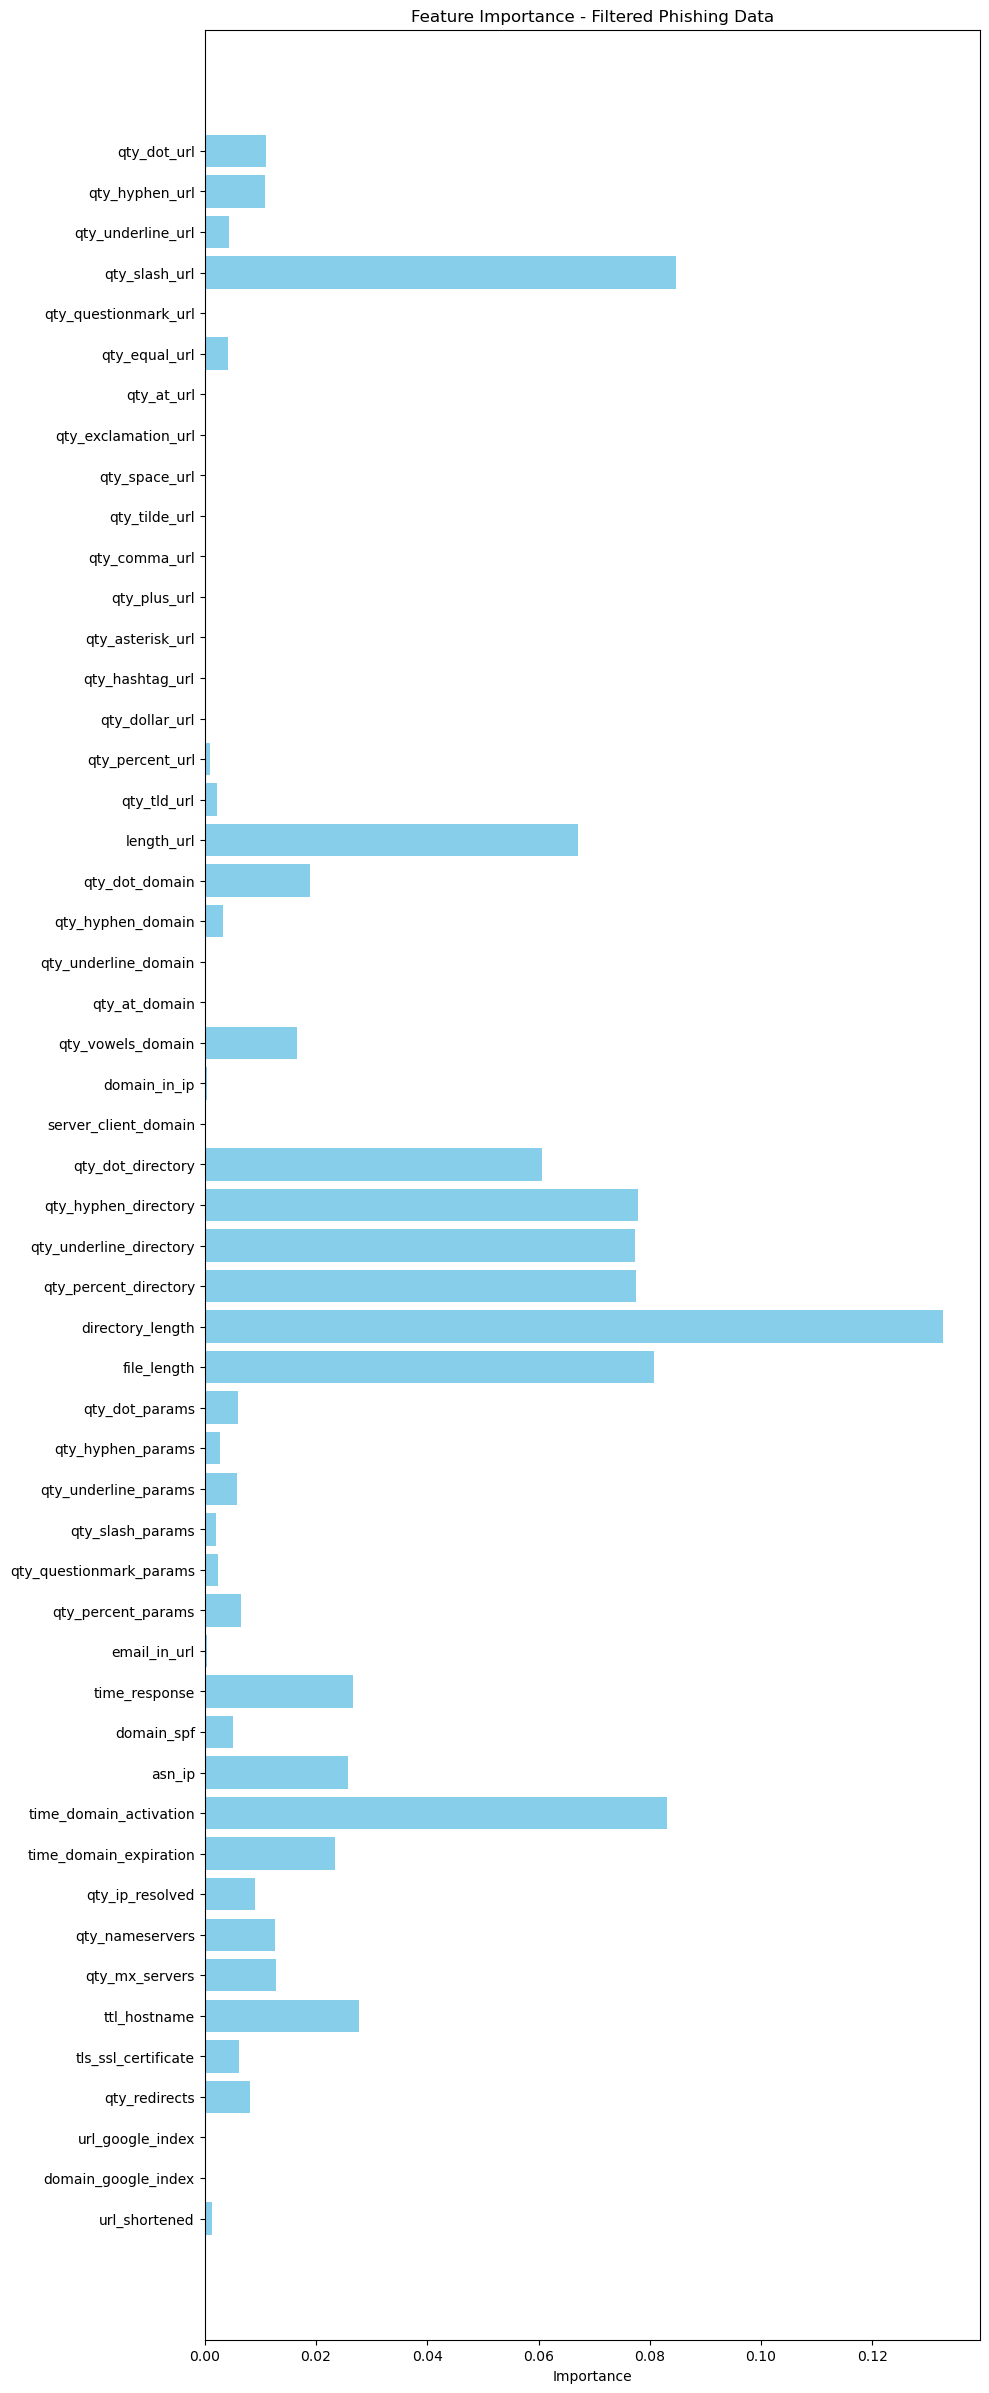

In [142]:
# Create a bar plot for feature importance
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 30))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Filtered Phishing Data')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()